In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task 1: Statistics

## Conditional Probabilities
You know the University of Bremen has 18,631 students, of which 6,671 are in natural sciences and engineering (see https://www.uni-bremen.de/en/university/profile/facts-figures ). Three-quarters of your friends in the natural sciences like mate (a beverage) from your personal experience. 
You are curious if you can determine how likely someone studies in this field, given they like mate. Therefore, you conduct a quick experiment in the mensa and ask at random tables the field and how much they like mate. 

The following matrix describes your data. The first column describes if the person studies natural sciences (or not) and the second how much they like mate (scale from -2 to 2, higher=likes better, neutral is not allowed).

In [4]:
questionaire_mate = np.array([[True, 1], [False, -1], [False, 1], [False, -1], [True, 1], [False, 1], [False, -2], [False, -1]])
questionaire_mate

array([[ 1,  1],
       [ 0, -1],
       [ 0,  1],
       [ 0, -1],
       [ 1,  1],
       [ 0,  1],
       [ 0, -2],
       [ 0, -1]])

Given a person likes mate, how likely are they to study in the natural sciences?

In [24]:
mate = questionaire_mate[:, 1]
study_MINT = questionaire_mate[:, 0]
    
prob_mate = (mate > 0).sum() / len(questionaire_mate) 
prob_uni = ((study_MINT == True) & (mate > 0)).sum() / len(questionaire_mate)

prob_MINT_given_mate = (prob_uni / prob_mate) 
print(prob_MINT_given_mate)

## Thus, the friend sample seem to overrepesent the prop to study MINT given a person likes mate.



0.5


## Maximum Likelihood Estimation
A Gaussian normal distribution can be fitted by applying the Maximum Likelihood Estimation to determine the best parameters for explaining a given dataset. This is equivalent to calculating the mean (and variance) on the dataset directly; why?

The Gaussian normal distribution is given as follows:

$$
N(\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}} 
e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$$

Hint: The partial derivative is easier to compute when using a log likelihood.

We assume a normal distrubution of likelihoods. Thus, when the data is normally distributed, the the distribution of likelihoods is the same than the data distribution.

Goal of maximum likelihood is to find the optimal way to fit a distribution to the data. We want the location that maximizes the likelihood of observaing the weights we measured. Thus it is the maximum likelihood estimate for the mean.

A normal distribution assumes the modus = mean = median. The variance in a normal distribution = 1

We wanna compute the total prob. of oberserving all of the data, (joint prob. distribution of all observed data points). 

Assumption: Randomization -> the the total prob. of observing all of the data is the product of observing each data point individually (.i.e. the product of the marginal prob).)


We need the product rule for differentiate of the maximum likelihood -> log likelihood

## Kullback-Leibler Divergence

$$D_{KL}(P|Q) = \sum_x P(x)log(\frac{P(x)}{Q(x)})$$

a) Calculate the KL divergence for two discrete distributions $P$ and $Q$ over events $A,B,C$. 
Calculate $D_{KL}(P|Q)$ and $D_{KL}(Q|P)$ and compare! 

| Distribution | A | B | C |
| --- | --- | --- | --- |
| P | 0.5 | 0.3 | 0.2 |
| Q | 0.4 | 0.2 | 0.4 |

In [13]:
p = [0.5,0.3,0.2]
q = [0.4,0.2,0.4]

def kl_div(p,q):
    prob = np.divide(p,q)
    kl = np.sum(p*np.log(prob))
    
    return kl

div_p = kl_div(p,q)
div_q = kl_div(q,p)

print(div_p)
print(div_q)

0.0945818719775651
0.10690843007666134


b) For this task, assume for simplicity that $P$ and $Q$ are discrete distributions over two events $A,B$. 

i) For a given $P$, what $Q_{min}$ minimizes $D_{KL}(P|Q)$? Justify your answer!

ii) For a given P, show that there is no upper bound for $D_{KL}(P|Q)$.

In [18]:
div_p_p = kl_div(p,p)
print(div_p_p)

# the minimal value for q is p itself. There should be "no differenec" between the distributions.

0.0


c) What is the relationship between KL divergence and cross-entropy?

In [ ]:
Cross Entropy = Entropy + KL Divergence.

# Task 2: Feature Compression

Assume you want to perform classification with two classes, $A$ and $B$ in the feature space ${\rm I\!R}^{2n}$. We can assume that the two classes follow a normal distribution, with $\mu_A = (\mu_1, \mu_2)$ and $\mu_B = (\mu_1, \mu_3)$, with $\mu_1, \mu_2, \mu_3 \in {\rm I\!R}^n$. $\Sigma$ is identical for both distributions, see below ($\sigma \in [0,1]$, $\alpha \approx 1$). You perform a Principal Component Analysis (PCA) for feature space transformation.

$$\sum =
\left(
  \begin{array}{ccc}
  \begin{array}{cc} 
\sigma & \alpha\\
\alpha & \sigma
\end{array} & \dots & 0  \\
  \vdots & \ddots & \vdots  \\
  0 & \dots & \begin{array}{cc} 
\sigma & \alpha\\
\alpha & \sigma
\end{array} 
\end{array} \right) \in \mathbb{R}^{2n \times 2n} $$

a) Without calculating the result, make a prediction about how the sorted sequence of Eigenvalues will look like! You do not need to give exact numbers, but sketch the graph of Eigenvalues by Eigenvector index. How many components do you anticipate to keep to retain most of the variance in the data?

Hint: you may choose to implement and plot an example for this task.
If so, np.random.multivariate_normal and sklearn.decomposition might come in handy.

The two classes are normally distributed. The first step in PCA is z-standardization. Leading to a standard normal distribution. Thus, both classes have the same mean and a std of 1. The two classes cannot be discriminated. 


b) Is the number of features you answered for part a) representative of the minimum number of features required for discriminating the two classes? Justify your answer!

No.

# Task 3: Logistic Regression


Logistic regression is a simple, but important classification technique (despite the name, it is not used for regression) for binary classification tasks. 

To classify a sample $x$, we:

1. Calculate $z(x) = \theta^Tx$ (to include a bias term, add a constant feature 1 to $x$).
2. Apply $h(x)=\sigma(z(x))$ with $\sigma(s)=\frac{1}{1+e^{-s}}$  
3. Apply a threshold $t$ to $h(x)$ to discriminate between the two classes (i.e., assign class 0 to $x \iff h(x) < t$)

For training, we initialize $\theta$ randomly and perform gradient descent, i.e., loop over the following steps:

1. Calculate the loss $J(\theta)$ on the training data with $J(\theta) = -y_1 \cdot log(p_1) - (1-y_1) \cdot log(1-p_1)$
2. Adjust the weights $\theta$ in the direction of $\frac{\delta J}{\delta \theta}$ with a learning rate of $l$

a) Argue why logistic regression can be considered a special case of a neural network.

In linear regression the sigmoid function is used as a link function. In simple neural network, similar to logist regrssion the weight are summed up and then pluggend into the sigmoid function.

b) Assume the logistic regression to detect a target class among non-targets. Describe how you can adjust the algorithm depending on whether a high recall or a high precision are more important in your application.

Its matter of how high we set the probability threshold, whether we classify an instance to our target class or not. 

For high precision: we set the threshold higher. We want as little false positives. Thus, setting the porb. threshold high we dont run the risk of errornously classifying instances that do not belong to the target class. The denumerater should be as small as possible in the recall formular = TP / TP + FP. 

For high recall: we set the prob. threshold lower. We want as little false negatives as possible. Thus, setting the prob threshold lower decreases the risk of false negatives. Recall = TP / TP + FN

c) Program a classifier object LogisticRegression with methods fit(X,y) and predict(X) that implements training and classification as described above. While you should use PyTorch in all following programming tasks, use only elementary Python and numpy methods. For this purpose, you will need to determine the partial derivative of $J(\theta)$. Fill out the following skeleton class for this purpose.

In [70]:
EPS = 1e-12

class MyLogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.verbose = verbose
        self.weights = None
        self.loss_history = []
        self.threshold = 0.5
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        z = h = np.clip(z, EPS, 1-EPS)
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        h = np.clip(h, EPS, 1-EPS)
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        X = self.__add_intercept(X)
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient 
            
            # Calculate and store the loss
            loss = self.__loss(h, y)
            self.loss_history.append(loss)
            
            if self.verbose and i % 10000 == 0:
                # z = np.dot(X, self.weights)
                # h = self.__sigmoid(z)
                # loss = self.__loss(h, y)
                print(f'Iteration {i}, Loss: {loss}')
     
    def predict_prob(self, X):
        X = self.__add_intercept(X)
        z = np.dot(X, self.theta)
        return self.__sigmoid(z)
    
    def predict(self, X, threshold):
        
        return self.predict_prob(X) >= threshold

In [72]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

(X,y) = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

clf = MyLogisticRegression()

clf.fit(X_train, y_train)


In [76]:
from sklearn import metrics

y_pred = clf.predict(X_test, threshold = 0.5)
                      
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print(accuracy_score(y_test, y_pred))

[[ 0 52]
 [ 0 91]]
0.6363636363636364


d) Evaluate your logistic regression classifier with the BreastCancer data set (available in scikit-learn). The optimization problem during training of logistic regression is convex, i.e., it will always converge towards a global minimum. How can you verify this empirically?

Hint: if you had trouble implementing the logistic regression earlier, you may use the sklearn version here.

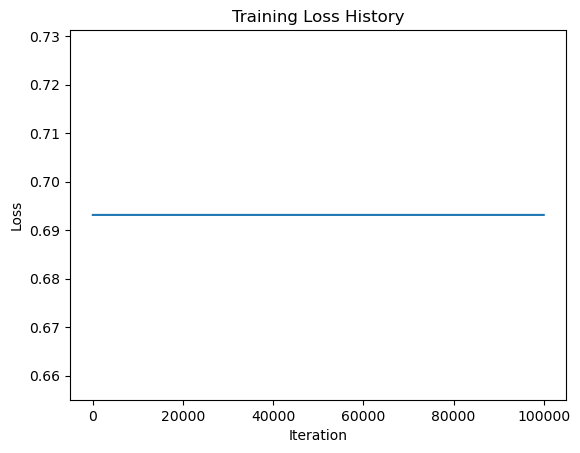

In [78]:
plt.plot(clf.loss_history)
plt.title('Training Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [77]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

(X,y) = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

model = LogisticRegression()

model.fit(X,y)
# clf.predict_prob(X)
pred = model.predict(X)

# clf = LogisticRegression().fit(X,y)
# clf.predict(X)

/Users/maraweber/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
